In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.impute import KNNImputer

warnings.filterwarnings("ignore") 
plt.style.use('seaborn-whitegrid') ###personal setting for the graphs


NB: Do not forget to chenge the years into age at the data of sale

# Plan

1. Identify the number and type of features 
    
2. Find the number/percentage of missing data for each feature 
    * visualize the results with a bar chart Identify the number and type of features 

3. Data distribution patterns
    * test the features and target variable for normalty 
    * plot them on histograms to visualize if they are normally distributed 
    * test transformations to achieve normal data 
    * visualize the results
    
4. Data correlations 
    * examine the correlation of each feature with the target variable 
    * examine the multicolinearity between features 
        * can also use pairplots 
    * suggests solutions to the challenges that are observed
    
5. Visualize dimension reductions 
    * segment the target Variable 
    * conduct PCA and visualize the results 
    * conduction TSNE analysis 

# Data Summary

1. Load the Data 
2. Identify initial dimensions 
3. Find missing variables for each feature and graph them - bar/scatter plot
5. find missing feature for each example and graph them - scartter plot

In [2]:
# loading the data 

raw_df = pd.read_csv("train.csv")

print(f"The number of repeated data points are: {raw_df.shape[0] - len(set(raw_df.Id))}") # setting the Ids to ensure single counts only
raw_df.drop('Id', axis=1, inplace = True)
print(f"The number of features is: {raw_df.shape[1]}")
print(f"The number of instances is: {raw_df.shape[0]}")
print("\n\n")

print("The first 5 rows of the raw dataset:")
print("\n")
raw_df.head()

The number of repeated data points are: 0
The number of features is: 80
The number of instances is: 1460



The first 5 rows of the raw dataset:




,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


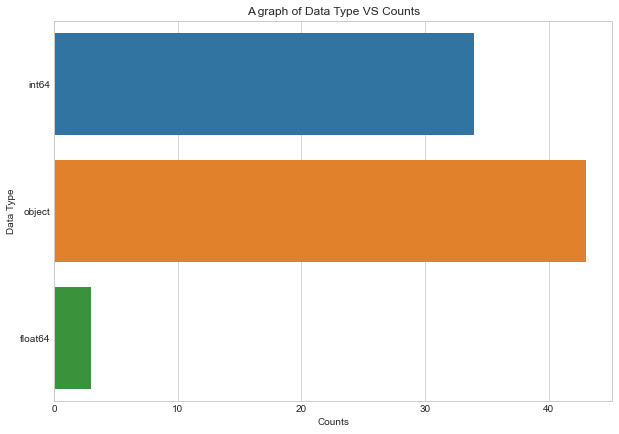

In [3]:
# inspecting the data types assigned when we uploaded the csv 

# visualizing the distribution of dtypes 
def visualize_dtypes(df):
    dtypes_list = []

    # calculating the counts of each feature
    for feature in df.columns:
        feature_dtype = df[feature].dtype.name
        dtypes_list.append(feature_dtype)

    fig,axes = plt.subplots(figsize=(10,7))
    axes = sns.countplot(y=dtypes_list)
    plt.xlabel('Counts')
    plt.ylabel('Data Type')
    plt.title('A graph of Data Type VS Counts')
    plt.show()
    
    return None

visualize_dtypes(raw_df)

In [4]:
# further inspection of data types assigned 
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

The assigned data types are not representative of the true type for some of the features. Reading metadata that contains description of what each feature contains helped me identify the actual data types I would like to use. All features that contain continous variables will be converted to 'numeric' type and the rest will be converted to the 'category' type.

Certain features like 'GarageCars' and 'FullBath' were initially assigned the int type but were placed in the categorical data section because they were assessed and found to be ordinal variables.

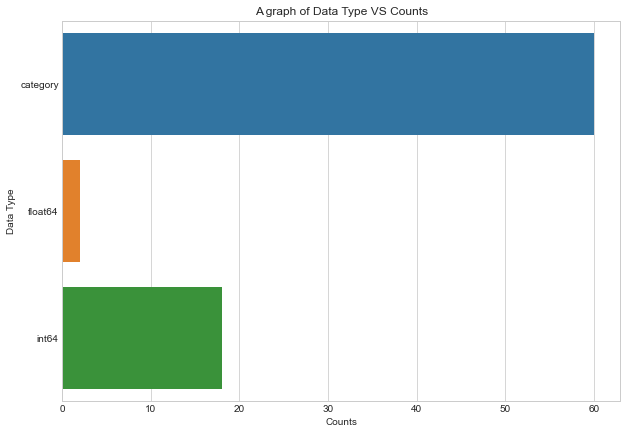

In [5]:
# Changing some default data types

feature_dtypes = {'MSSubClass':'category', 'MSZoning':'category', 'LotFrontage':'numeric', 'LotArea':'numeric', 'Street':'category',
       'Alley':'category', 'LotShape':'category', 'LandContour':'category', 'Utilities':'category', 'LotConfig':'category',
       'LandSlope':'category', 'Neighborhood':'category', 'Condition1':'category', 'Condition2':'category', 'BldgType':'category',
       'HouseStyle':'category', 'OverallQual':'category', 'OverallCond':'category', 'YearBuilt':'category', 'YearRemodAdd':'category',
       'RoofStyle':'category', 'RoofMatl':'category', 'Exterior1st':'category', 'Exterior2nd':'category', 'MasVnrType':'category',
       'MasVnrArea':'numeric', 'ExterQual':'category', 'ExterCond':'category', 'Foundation':'category', 'BsmtQual':'category',
       'BsmtCond':'category', 'BsmtExposure':'category', 'BsmtFinType1':'category', 'BsmtFinSF1':'numeric',
       'BsmtFinType2':'category', 'BsmtFinSF2':'numeric', 'BsmtUnfSF':'numeric', 'TotalBsmtSF':'numeric', 'Heating':'category',
       'HeatingQC':'category', 'CentralAir':'category', 'Electrical':'category', '1stFlrSF':'numeric', '2ndFlrSF':'numeric',
       'LowQualFinSF':'numeric', 'GrLivArea':'numeric', 'BsmtFullBath':'category', 'BsmtHalfBath':'category', 'FullBath':'category',
       'HalfBath':'category', 'BedroomAbvGr':'category', 'KitchenAbvGr':'category', 'KitchenQual':'category',
       'TotRmsAbvGrd':'category', 'Functional':'category', 'Fireplaces':'category', 'FireplaceQu':'category', 'GarageType':'category',
       'GarageYrBlt':'category', 'GarageFinish':'category', 'GarageCars':'category', 'GarageArea':'numeric', 'GarageQual':'category',
       'GarageCond':'category', 'PavedDrive':'category', 'WoodDeckSF':'numeric', 'OpenPorchSF':'numeric',
       'EnclosedPorch':'numeric', '3SsnPorch':'numeric', 'ScreenPorch':'numeric', 'PoolArea':'numeric', 'PoolQC':'category',
       'Fence':'category', 'MiscFeature':'category', 'MiscVal':'numeric', 'MoSold':'category', 'YrSold':'category', 'SaleType':'category',
       'SaleCondition':'category', 'SalePrice':'numeric'}


for feature, feature_dtype in feature_dtypes.items():
    if feature_dtype == "category":
        raw_df[f'{feature}'] = raw_df[f'{feature}'].astype(f'{feature_dtype}')
    else:
        raw_df[f'{feature}'] = pd.to_numeric(raw_df[f'{feature}'])

# visualise the new dtypes
visualize_dtypes(raw_df)

It appears that over 2/3 of our features are categorical. Several features denote the year some feature or house was built or sold. They were temporarily marked as categorical variables because they resemble ordinal data more than continous data. They will later be transformed into 'age' but subtracting them from the year the house was sold. 'Age' will be a continous varible. 

## Missing Data

Missing data is a problem that may affect the ultimate number of examples we have for modeling. The percentage of missing data influences how we will handle such data. If only a few examples are missing within a feature, then we may look at replacing them with the mean or most frequent value for that feature. 

If an example has too many missing values across to many feature, we may want to delete it all together. This approach can be take for features that has to many values missing as well. For our puposes, features missing more than 10% of the data will be removed as well as examples missing more than 10% of their data.  

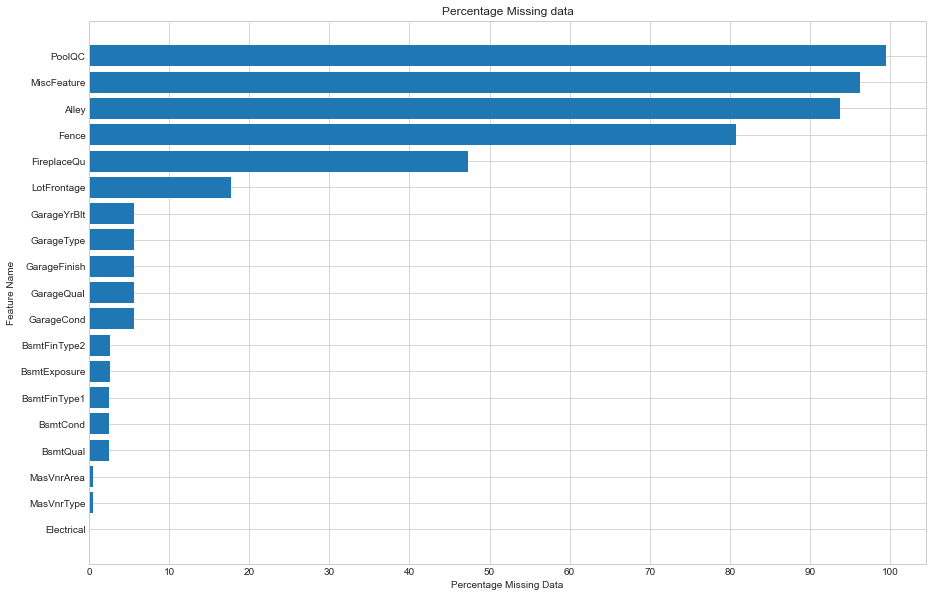

In [6]:
# missing values as a percentage of the data 

missing_data = (raw_df.isnull().sum()/raw_df.shape[0]) * 100
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(ascending=True,inplace=True)

fig,axes = plt.subplots(figsize=(15,10))
axes = plt.barh(missing_data.index, width =np.array(missing_data) )
plt.xlabel('Percentage Missing Data')
plt.ylabel('Feature Name')
plt.xticks([x for x in range(0,110,10)])
plt.title('Percentage Missing data')
plt.show()

The above graph shows that 6 features have more than 10% missing data. They will be eliminated from the data set before further explorations can be done. Another  12 features are missing about 5% or less of their data. It seems reasonable to impute values for the latter features and disregard the former. There is no missing data in the target variable. 

In [7]:
# removing columns with too many missing values 

raw_df.drop(missing_data[missing_data > 10].index, axis = 1, inplace = True)
print(f"The number of features is now: {raw_df.shape[1]}")
print(f"The number of instances is now : {raw_df.shape[0]}")
print("\n\n")

The number of features is now: 74
The number of instances is now : 1460





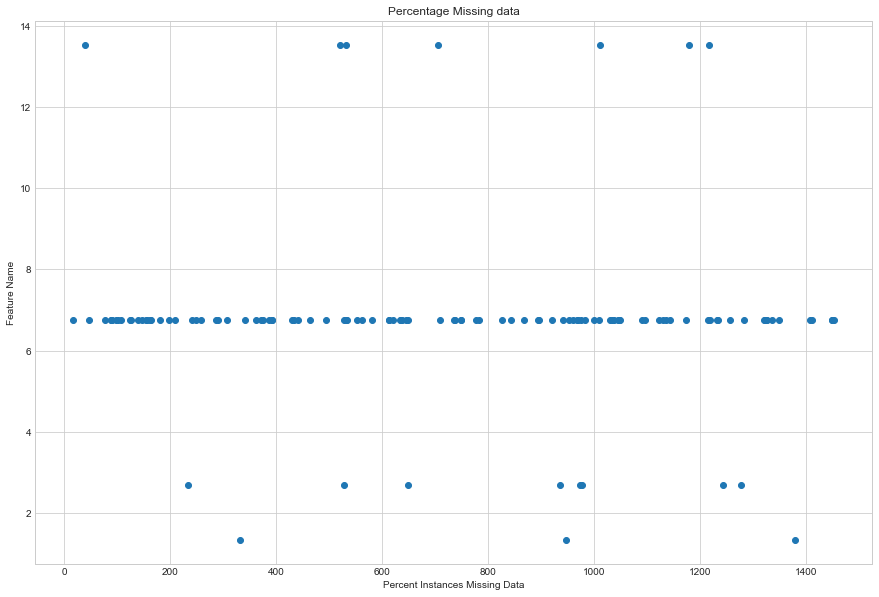

In [8]:
# checking instances with missing values 

instances_missing_data = (raw_df.isnull().sum(axis=1)/raw_df.shape[1]) * 100
instances_missing_data = instances_missing_data[instances_missing_data > 0]
instances_missing_data.sort_values(ascending=True,inplace=True)

fig,axes = plt.subplots(figsize=(15,10))
axes = plt.scatter(x=instances_missing_data.index, y =np.array(instances_missing_data) )
plt.xlabel('Percent Instances Missing Data')
plt.ylabel('Feature Name')
plt.title('Percentage Missing data')
plt.show()

There are 7 instances missing over 10% of their data. Another 115 are missing less than 7% data. Those missing above 10 percent data will be disregards and the rest will be imputted. 

In [9]:
# removing columns with too many missing values 
raw_df.drop(instances_missing_data[instances_missing_data > 10].index, axis = 0, inplace = True)

print(f"The number of features is now: {raw_df.shape[1]}")
print(f"The number of instances is now : {raw_df.shape[0]}")
print("\n\n")

The number of features is now: 74
The number of instances is now : 1453





### Imputing missing numeric data 

For imputing purposes, the data will be separated between catergorical and numeric. This allows us to use the KNN imputer for numeric variables and use the most frequent value to impute missing values in the categorical features. 

In [10]:
# extracting numeric data
numeric_df_columns = raw_df.select_dtypes(include = ["float64", "int64"]).columns
numeric_df = raw_df[numeric_df_columns]

In [11]:
# find the number of missing data in the numeric df before imputations 
print(f"The number of missing numeric values is: {numeric_df.isnull().values.sum()}")

The number of missing numeric values is: 8


In [12]:
# imputing missing numeric data 

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean') # nan_euclidean ignores missing values

# fit on the dataset
imputer.fit(numeric_df)

# fit on the dataset
imputer.fit(numeric_df)

# transform the dataset
numeric_df = imputer.transform(numeric_df)

#check for missing data 
print('The number of missing numeric values is now:{}\n'.format(sum(np.isnan(numeric_df).flatten())))



The number of missing numeric values is now:0



In [13]:
# turning the numeric data back into a data frame from a numpy array

numeric_df = pd.DataFrame(numeric_df, columns = numeric_df_columns)
numeric_df.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000.0
4,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


There are no more missing values in the numerical data. 

### Imputing missing categorical data 

We will try something interesting. Inseated of just imputing all values using the most ferequent value for a featue, we will attempt to use the most frequent value for n-closest neighbours. The closest neighbors will be detrmined using the numeric features. This way is better because it avoiding using categorical data inaproprietly. Others have approached a similar challenge by encoding categorical data with numeric values and using the normal kNN imputer. While I do not hold anything against such an approach, I feel that it assigns inappropriet meaning to categorical data, espeacially norminal data. 

#### Steps 

1. Extract all categorical variables
2. Find the instances with missing values
3. Use the numeric features and KDTrees to generate a matrix of ditances between intances
4. Identify the most frequent value for n-closest neighbors at the position where the target instance has a missing value
5. Impute the missing value
 

In [14]:
from sklearn.neighbors import KDTree
import pickle

In [15]:
# extracting categorical data 
catergorical_df = raw_df[raw_df.select_dtypes(include = ["category"]).columns]
print(f"The number of missing categorical values in is: {catergorical_df.isnull().values.sum()}")

The number of missing categorical values in is: 531


In [16]:
# building a pickled KDTree using the numeric data 

X = numeric_df.to_numpy()  # will use the numeric data as an np array to calculate the distances 
tree = KDTree(X, leaf_size=2)  # becareful with the leaf_size because it affects the speed of a query and the memory required to store the constructed tree      
s = pickle.dumps(tree) # the state of the tree is saved in the pickle operation                    
tree_copy = pickle.loads(s)                


In [17]:
# extracting the initial instances with missing data  
instances_missing_data = catergorical_df.isnull().sum(axis=1)
instances_missing_data = instances_missing_data[instances_missing_data > 0]
instances_missing_data = instances_missing_data.index
instances_missing_data

# initialsing the number of neighbors to consider
number_of_nn = 7

while(len(instances_missing_data) > 0 ):

    for instance in instances_missing_data:

        # find their closest N neighbours 
        dist, ind = tree_copy.query(X[:], k=number_of_nn) # using 8 nearest neighbours 

        # get the actual index of an instance disguished by loc
        unique_index = catergorical_df.index
        actual_instance_index = unique_index.get_loc(instance)

        # find the column(s) where there is missing data  
        columns_missing_data = catergorical_df.iloc[actual_instance_index].isnull()
        columns_missing_data = columns_missing_data[columns_missing_data]
        columns_missing_data = columns_missing_data.index

        # find the most frequent value of the closest neighbours for those values 
        for column in columns_missing_data:

            current_column = [] # initializing a list to populate with values from closest neighbors

            # iterating through the nearest neightbours indeces
            for nn in ind[actual_instance_index]:
                try:
                    current_column.append(catergorical_df[column][nn])
                except:
                    continue
            # find the most frequent value for the current feature 
            most_frequent_value = max(set(current_column), key = current_column.count)

            # replace the missing value with the most frequent value in the neighbours 
            catergorical_df[column][instance] = most_frequent_value # this uses loc indexing, hence instance not actual_instance_value

    # updating the instances with missing data 
    instances_missing_data = catergorical_df.isnull().sum(axis=1)
    instances_missing_data = instances_missing_data[instances_missing_data > 0]
    instances_missing_data = instances_missing_data.index
    instances_missing_data
    
    # updating the number of neighbors to consider
    number_of_nn += 1

print(f"The number of missing categorical values in is: {catergorical_df.isnull().values.sum()}")

The number of missing categorical values in is: 0


Both numeric and categorical variables no longer have missing data. Now we can start exploring how each feature relates to the target variable. 

## Data distribution patterns

    * test the features and target variable for normalty 
    * plot them on histograms to visualize if they are normally distributed 
    * test transformations to achieve normal data 
    * visualize the results

Normality is an important assumption for many statistical techniques. Therefore, it is important to check if the data meets this criteri and potentially transform it if not. 

### Testing the target variable to see if it normally distributed and for skewness

In [29]:
import scipy.stats as stats
from scipy.stats import skew 


We will beging our exploration by understanding the distribution of the target variable first. Fistly, we will examine the skewness and kurtosis of the data. 

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. A general guideline for skewness is that if the number is greater than +1 or lower than –1, this is an indication of a substantially skewed distribution.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. The general guideline is that if the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat. 


Refs: 
* https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm 
* https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness

In [26]:
# skewness and kurtosis 

print(f"The Skewness value of the target variable is: {numeric_df['SalePrice'].skew()}")
print(f"The Kurtosis value of the target variable is: {numeric_df['SalePrice'].kurt()}")


The Skewness value of the target variable is: 1.8950128820284293
The Kurtosis value of the target variable is: 6.585047502596432


Our target variable is evidently not normally distributed. It has high skewness and kurtosis value, indicating significant skeness to the right and strong peakeness.

The target variable will need to some transformation to become normally distributed. Two common ways to do this are:
1. the box-cox transformation
2. the johnson transformation

The box-cox transformations is relatively simple, but it has restricted applications since it only works with positive values. This is not a major concern to use since we know all house prices are positive unless they were entered in error. We will opt for the more complex jonhson transformation because it works most of the time relative to the former method. 

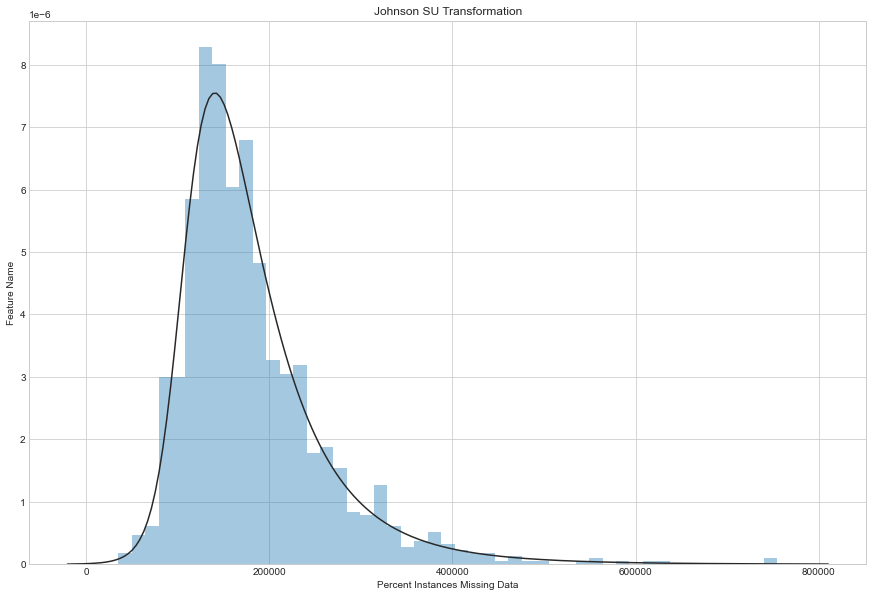

In [66]:
fig,axes = plt.subplots(figsize=(15,10))
axes = sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.xlabel('Percent Instances Missing Data')
plt.ylabel('Feature Name')
plt.title('Johnson SU Transformation')
plt.show()

### Testing Normality in  the numeric variables 

Aside from skewness and kurtosis, we can also use the Shapiro-Wilk test to assess if our data comes from a normal distribution. The test gives a W value; small values indicate the sample is not normally distributed (there is evidence to reject the null hypothesis that your population is normally distributed if your values are under a certain threshold)

In [45]:
# testing for normality using the Shapiro-Wilk test

test_normality = lambda x: stats.shapiro(x)[1] < 0.01
normal = numeric_df.apply(test_normality)
print(not normal.any())

False


According the the Shapiro-Wilk test, all our features are not normally distributed. Therefore, they all need some transformation to become normally distributed. 

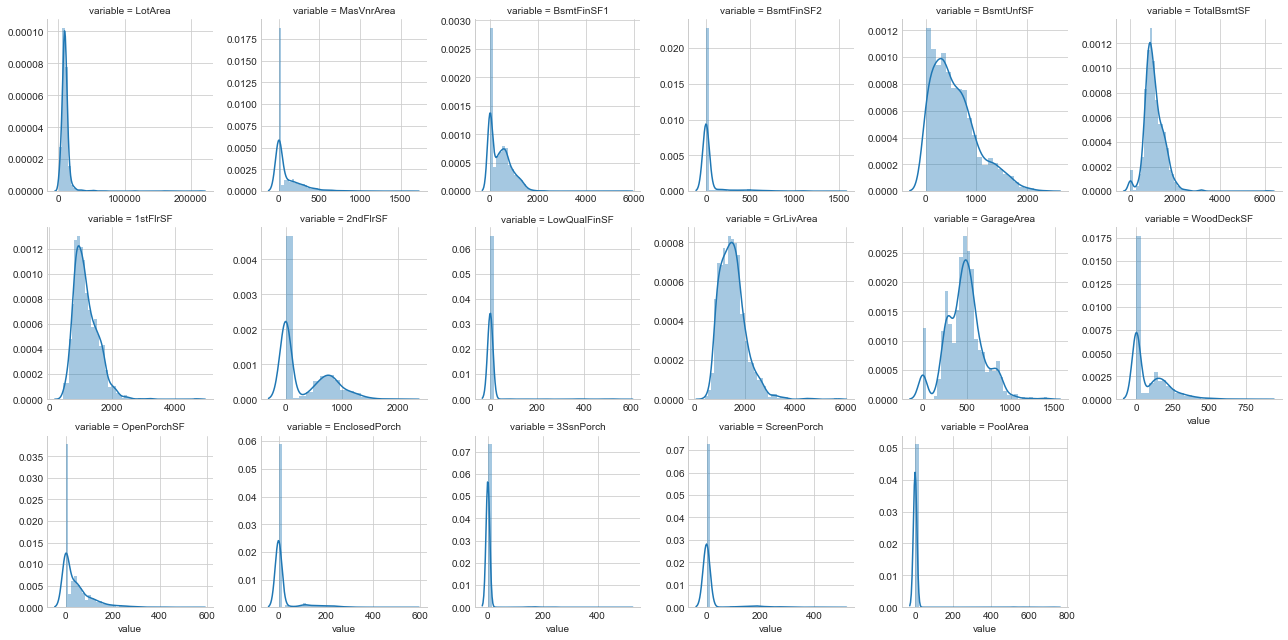

In [62]:
# visualizing the distribution of the rest of the numeric data 

fig = pd.melt(numeric_df, value_vars=[x for x in numeric_df_columns[:len(numeric_df_columns)-2]]) # excluding Sale Price
axes = sns.FacetGrid(fig, col="variable",  col_wrap=6, sharex=False, sharey=False)
axes = axes.map(sns.distplot, "value")

 The graphs above depict the distribution of our features. It is evident that most of them are severely skewed. 

### Transforming all the numeric data data using johnson transformation

For ease of emplementation, we will transform the numeric data using a variation of the johnson transformation called Yeo-Jonhson transformation. It can be can be thought of as an extension of the Box-Cox transformation. It handles both positive and negative values, whereas the Box-Cox transformation only handles positive values. Both can be used to transform the data so as to improve normality.

Ref:
https://feature-engine.readthedocs.io/en/latest/transformation/YeoJohnsonTransformer.html

In [69]:
from feature_engine import transformation as vt

# to install : conda install -c conda-forge feature_engine

In [80]:
# set up the variable transformer
tf = vt.johnsonsuTransformer(variables = list(numeric_df_columns))

# fit the transformer
tf.fit(numeric_df)

# transform the data
transformed_numeric_df= tf.transform(numeric_df)

AttributeError: module 'feature_engine.transformation' has no attribute 'johnsonsuTransformer'

In [74]:
transformed_numeric_df

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,10.477368,3.066051,15.525553,-0.000000,20.624171,183.209688,4.332062,4.529348,-0.0,6.504387,208.078603,-0.000000,4.247515,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.222991
1,10.647838,-0.000000,17.088935,-0.000000,28.606156,243.144776,4.475786,-0.000000,-0.0,6.272821,180.313442,4.634217,0.000000,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.222991
2,10.860707,3.008231,13.875113,-0.000000,35.418791,193.105063,4.359360,4.535244,-0.0,6.537323,226.532240,-0.000000,3.861009,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.222991
3,10.640848,-0.000000,10.753145,-0.000000,39.503126,167.328891,4.375732,4.477402,-0.0,6.507483,236.838367,-0.000000,3.674046,0.699892,-0.0,-0.0,-0.0,-0.000000,0.222991
4,11.180928,3.227625,15.182443,-0.000000,37.634676,226.503035,4.440503,4.616774,-0.0,6.693822,293.882768,4.344562,4.582347,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.222991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,10.390588,-0.000000,0.000000,-0.000000,52.331877,198.133099,4.372600,4.440456,-0.0,6.475912,180.313442,-0.000000,3.810848,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.222991
1449,11.073774,2.909297,16.051412,0.660154,41.247915,281.352336,4.648370,-0.000000,-0.0,6.649797,193.045653,4.736111,0.000000,-0.000000,-0.0,-0.0,-0.0,-0.000000,0.222991
1450,10.567748,-0.000000,11.621265,-0.000000,50.232385,227.511433,4.453930,4.653575,-0.0,6.740788,110.124330,-0.000000,4.230299,-0.000000,-0.0,-0.0,-0.0,0.228964,0.222991
1451,10.664059,-0.000000,6.391547,0.660428,0.000000,216.763500,4.418391,-0.000000,-0.0,6.151688,105.802563,4.766560,0.000000,0.699306,-0.0,-0.0,-0.0,-0.000000,0.222991


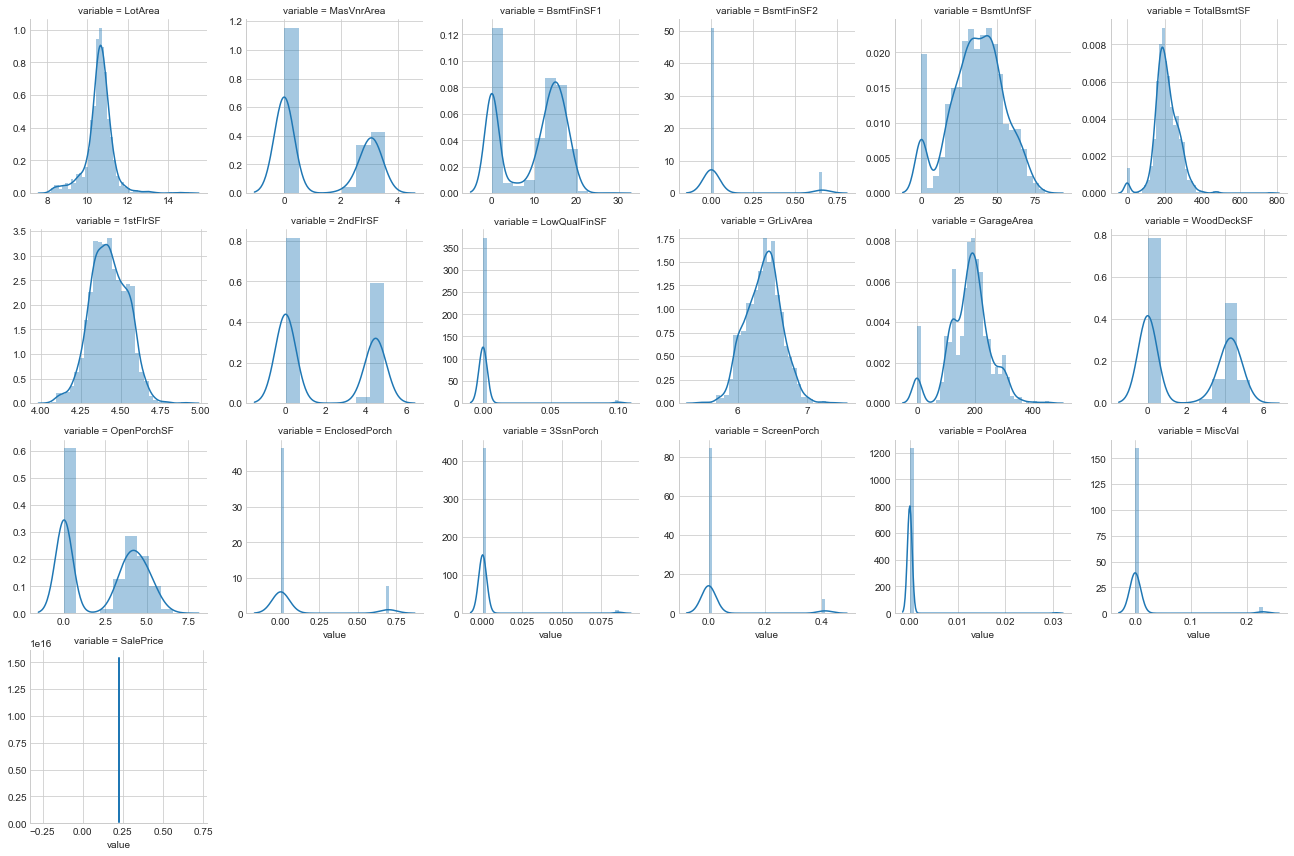

In [77]:
# visualizing the transformed data 

fig = pd.melt(transformed_numeric_df, value_vars=transformed_numeric_df) # excluding Sale Price
axes = sns.FacetGrid(fig, col="variable",  col_wrap=6, sharex=False, sharey=False)
axes = axes.map(sns.distplot, "value")

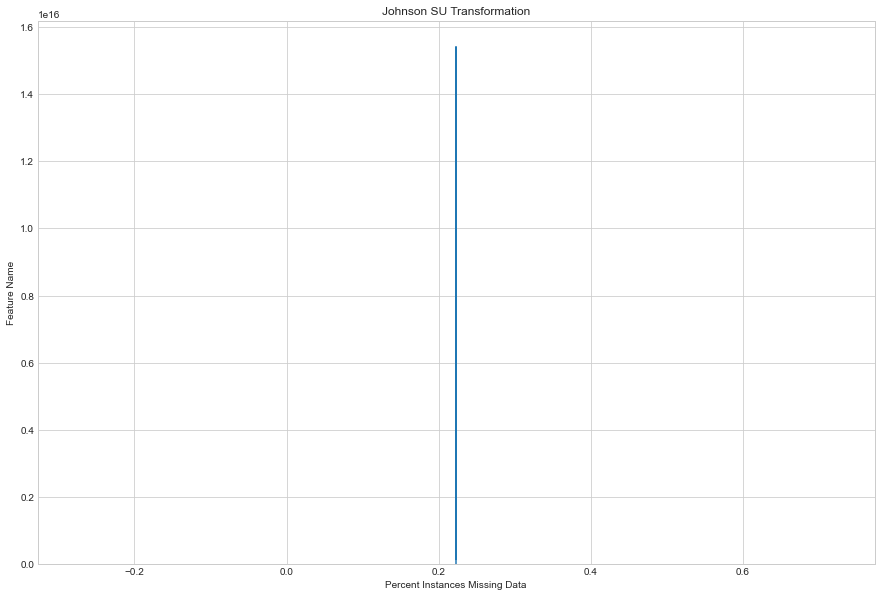

In [79]:
fig,axes = plt.subplots(figsize=(15,10))
axes = sns.distplot(transformed_numeric_df['SalePrice'])
plt.xlabel('Percent Instances Missing Data')
plt.ylabel('Feature Name')
plt.title('Johnson SU Transformation')
plt.show()